<a href="https://colab.research.google.com/github/RMoulla/pyk/blob/main/TP_Seloger_Correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Travaux pratiques : analyse des prix des biens immobiliers.

Étude d'un jeu de données comportant des informations immobilières provenant du site seloger.com.

Dans un premier temps, nous nous proposons de faire une étude exploratoire pour se familiariser avec la donnée et comprendre comment les variables se comportent. Cette étape permettra egalement de débusquer d'eventuelles anomalies et de nettoyer la donnée si nécessaire.

Dans un second temps, nous nous attacherons à l'explicabilité des données, c'est à dire répondre à la question "Quelles sont les variables les plus importantes pour expliquer le prix d'un bien ?"

Finalement, nous entrainerons des modèles de Machine Learning sur des données d'entrainement et nous prédirons sur des données de test afin d'évaluer les performances du modèles.

In [ ]:
# Librairie pour lire des fichiers de données tabulaires
import pandas as pd

In [ ]:
pd.set_option("display.max_columns", 25)
file_path = 'selogerdata.csv'
dataset = pd.read_csv(file_path)

In [ ]:
dataset.shape

(8899, 24)

Le jeu de données contient 8899 lignes et 24 colonnes.

In [ ]:
# Visualiser les 5 premières lignes du dataset
dataset.head()

,number,codeinsee,codepostal,cp,etage,idagence,idannonce,idtiers,idtypechauffage,idtypecommerce,idtypecuisine,idtypepublicationsourcecouplage,naturebien,nb_chambres,nb_photos,nb_pieces,position,prix,si_balcon,si_sdEau,si_sdbain,surface,typedebien,ville
0,11,750116,75016,75016,0,178817,144013899,227883,0,0,√©quip√©e,SL,1,2,13,3,11,59000,1,0,0,69.00,Appartement,Paris 16√®me
1,8,750110,75010,75010,0,12089,149750677,3765,0,0,aucune,SL,1,2,7,1,8,77500,0,0,0,8.49,Appartement,Paris 10√®me
2,6,750118,75018,75018,0,115811,138648733,108873,0,0,aucune,SL,1,1,8,2,6,94000,0,0,0,37.00,Appartement,Paris 18√®me
3,16,750110,75010,75010,0,12089,149750679,3765,0,0,aucune,SL,1,2,4,1,16,96000,0,0,0,10.26,Appartement,Paris 10√®me
4,4,750116,75016,75016,0,97567,147153067,145098,0,0,0,SL,1,1,5,2,4,100000,0,0,0,14.93,Appartement,Paris 16√®me


## Nettoyage des données

On peut d'ores et déjà remarquer que les colonnes `idtypecyuisine` et `ville` doivent etre nettoyées

In [ ]:
# Afficher le nom des colonnes du dataset
dataset.columns

Index(['number', 'codeinsee', 'codepostal', 'cp', 'etage', 'idagence',
       'idannonce', 'idtiers', 'idtypechauffage', 'idtypecommerce',
       'idtypecuisine', 'idtypepublicationsourcecouplage', 'naturebien',
       'nb_chambres', 'nb_photos', 'nb_pieces', 'position', 'prix',
       'si_balcon', 'si_sdEau', 'si_sdbain', 'surface', 'typedebien', 'ville'],
      dtype='object')

In [ ]:
# Afficher la fréquence des types de cuisine.
dataset['idtypecuisine'].unique()

array(['√©quip√©e', 'aucune', '0', 'coin cuisine √©quip√©',
       'coin cuisine', 's√©par√©e', 's√©par√©e √©quip√©e', 'am√©ricaine',
       'am√©ricaine √©quip√©e', '-1'], dtype=object)

Que veulent dire les valeurs 0 et -1 ?
On pourrait penser que 0 corresond à la situation ou il n'y a pas de cuisine mais ce n'est pas le cas en regardant les données. Nous allons créer des groupes à part pour ces catégories


In [ ]:
# Correction des données
mapper = {
    's√©par√©e': 'séparée',
    '0': 'categorie_0',
    's√©par√©e √©quip√©e': 'séparée équipée',
    'am√©ricaine √©quip√©e': 'américaine équipée',
    '√©quip√©e': 'équipée',
    'aucune' : 'aucune',
    'am√©ricaine': 'américaine',
    'coin cuisine': 'coin cuisine',
    'coin cuisine √©quip√©': 'coin cuisine équipé',
    '-1': 'catégorie_1'
}

In [ ]:
# Appliquer les corrections
dataset['idtypecuisine'] = dataset['idtypecuisine'].map(mapper)

Nous allons également corriger les caractères accentués pour la variable ville.

In [ ]:
# Afficher les 10 premières villes
dataset['ville'].unique()

array(['Paris 16√®me', 'Paris 10√®me', 'Paris 18√®me', 'Melun',
       'Corbeil Essonnes', '√âtampes', 'Issou', 'Limay', '√âvry', 'Avon',
       'Evry', 'Saint-Denis', 'Trappes', 'Ris Orangis', 'Paris 19√®me',
       'Paris 14√®me', '√âpinay-sous-S√©nart', 'Eragny sur Oise',
       'Argenteuil', 'Bessancourt', 'Etampes', 'Montlhery', 'Gagny',
       'Fleury Merogis', 'Villeparisis', 'Fosses', 'Vaujours', 'Les Ulis',
       'Meaux', 'Pontoise', 'Cergy', 'Verneuil sur Seine',
       'Brie Comte Robert', 'Carrieres sous Poissy', 'H√©ricy', 'Igny',
       'Paris 20√®me', 'Les Pavillons-sous-Bois', 'Mennecy',
       'Vert le Petit', 'Morsang-sur-Orge', 'Linas', 'Mandres les Roses',
       'Paris 17√®me', 'Villepinte', 'Paris 2√®me', 'Paris 15√®me',
       'Paris 6√®me', 'Paris 3√®me', 'Paris 8√®me', 'Paris 5√®me',
       'Paris 11√®me', 'Paris 9√®me', 'Paris 13√®me', 'Paris 12√®me',
       'Garches', 'Chatou', 'Sucy en Brie', 'Louveciennes', 'Le Pecq',
       'Enghien les Bains', 'Saint Ger

In [ ]:
# Corriger les accents
dataset['ville'] =  (
    dataset['ville']
    .str.replace('√®', 'è')
    .str.replace('√â', 'É')
    .str.replace('√©', 'é')
    .str.replace('√¨', 'ê')
)

In [ ]:
dataset['ville'].unique()

array(['Paris 16ème', 'Paris 10ème', 'Paris 18ème', 'Melun',
       'Corbeil Essonnes', 'Étampes', 'Issou', 'Limay', 'Évry', 'Avon',
       'Evry', 'Saint-Denis', 'Trappes', 'Ris Orangis', 'Paris 19ème',
       'Paris 14ème', 'Épinay-sous-Sénart', 'Eragny sur Oise',
       'Argenteuil', 'Bessancourt', 'Etampes', 'Montlhery', 'Gagny',
       'Fleury Merogis', 'Villeparisis', 'Fosses', 'Vaujours', 'Les Ulis',
       'Meaux', 'Pontoise', 'Cergy', 'Verneuil sur Seine',
       'Brie Comte Robert', 'Carrieres sous Poissy', 'Héricy', 'Igny',
       'Paris 20ème', 'Les Pavillons-sous-Bois', 'Mennecy',
       'Vert le Petit', 'Morsang-sur-Orge', 'Linas', 'Mandres les Roses',
       'Paris 17ème', 'Villepinte', 'Paris 2ème', 'Paris 15ème',
       'Paris 6ème', 'Paris 3ème', 'Paris 8ème', 'Paris 5ème',
       'Paris 11ème', 'Paris 9ème', 'Paris 13ème', 'Paris 12ème',
       'Garches', 'Chatou', 'Sucy en Brie', 'Louveciennes', 'Le Pecq',
       'Enghien les Bains', 'Saint Germain en Laye', 'Paris 

## Analyse exploratoire des données
Nous allons commencer par un aperçu sur les données sous forme de résumé statitiques des différentes variables numériques.

In [ ]:
dataset.describe()

,number,codeinsee,codepostal,cp,etage,idagence,idannonce,idtiers,idtypechauffage,idtypecommerce,naturebien,nb_chambres,nb_photos,nb_pieces,position,prix,si_balcon,si_sdEau,si_sdbain,surface
count,8899.000000,8899.000000,8899.000000,8899.000000,8899.0,8899.000000,8.899000e+03,8899.000000,8899.0,8899.0,8899.000000,8899.000000,8899.000000,8899.000000,8899.000000,8.899000e+03,8899.000000,8899.0,8899.0,8899.000000
mean,9.531296,751745.680189,75186.144735,75186.144735,0.0,124110.094280,1.473531e+08,136989.252500,0.0,0.0,1.638723,2.319474,9.697269,3.838746,9.531296,1.210579e+06,0.271716,0.0,0.0,96.070707
std,5.765614,16287.896954,1660.091189,1660.091189,0.0,104338.907661,3.661055e+06,109732.960794,0.0,0.0,0.931184,1.170877,4.511174,1.483164,5.765614,4.462923e+05,0.444869,0.0,0.0,38.127731
min,0.000000,750101.000000,75001.000000,75001.000000,0.0,33.000000,7.437284e+07,98.000000,0.0,0.0,1.000000,1.000000,0.000000,1.000000,0.000000,5.900000e+04,0.000000,0.0,0.0,0.000000
25%,5.000000,750108.000000,75008.000000,75008.000000,0.0,39738.000000,1.463174e+08,26516.000000,0.0,0.0,1.000000,1.000000,6.000000,3.000000,5.000000,7.950000e+05,0.000000,0.0,0.0,66.400000
50%,10.000000,750114.000000,75014.000000,75014.000000,0.0,93920.000000,1.486361e+08,123925.000000,0.0,0.0,1.000000,2.000000,9.000000,4.000000,10.000000,1.475000e+06,0.000000,0.0,0.0,93.000000
75%,15.000000,750116.000000,75017.000000,75017.000000,0.0,203657.000000,1.495161e+08,213489.000000,0.0,0.0,3.000000,3.000000,12.000000,5.000000,15.000000,1.490000e+06,1.000000,0.0,0.0,129.000000
max,19.000000,950500.000000,95880.000000,95880.000000,0.0,362103.000000,1.502498e+08,425123.000000,0.0,0.0,3.000000,22.000000,27.000000,53.000000,19.000000,2.000000e+06,1.000000,0.0,0.0,250.000000


Ce résumé statistique comporte déjà plusieurs enseignements :

* Les colonnes `etage`, `idtypechauffage`, `idtypecommerce`, `si_sdEau`,	`si_sdbain` ne comportent que des valeurs nulles. Elles n'apportent donc aucune information pour expliquer ou prédire le prix.

* Le jeu de données contient des outliers : on peut par exemple noter que le maximum du nombre de pièces est 53. De même le maximum du nombre de chambre est 22. Par ailleurs le minimum de la surface est 0.

Regardons ces outliers plus en détails.


In [ ]:
# sélectionner la ligne qui correspond au bien ayant 53 pièces
dataset[dataset['nb_pieces'] == 53]

,number,codeinsee,codepostal,cp,etage,idagence,idannonce,idtiers,idtypechauffage,idtypecommerce,idtypecuisine,idtypepublicationsourcecouplage,naturebien,nb_chambres,nb_photos,nb_pieces,position,prix,si_balcon,si_sdEau,si_sdbain,surface,typedebien,ville
1318,18,750118,75018,75018,0,228375,149412073,261580,0,0,aucune,SL,1,2,12,53,18,580000,0,0,0,53.0,Appartement,Paris 18ème


In [ ]:
# Sélectionner la ligne qui correspond au bien ayant 22 chambres

dataset[dataset['nb_chambres'] == 22]

,number,codeinsee,codepostal,cp,etage,idagence,idannonce,idtiers,idtypechauffage,idtypecommerce,idtypecuisine,idtypepublicationsourcecouplage,naturebien,nb_chambres,nb_photos,nb_pieces,position,prix,si_balcon,si_sdEau,si_sdbain,surface,typedebien,ville
1236,0,750115,75015,75015,0,260996,146819689,282708,0,0,équipée,SL,1,22,4,3,0,567000,0,0,0,77.0,Appartement,Paris 15ème


In [ ]:
# Sélectionner la ligne qui correspond au bien dont la surface est nulle

dataset[dataset['surface'] == 0]

,number,codeinsee,codepostal,cp,etage,idagence,idannonce,idtiers,idtypechauffage,idtypecommerce,idtypecuisine,idtypepublicationsourcecouplage,naturebien,nb_chambres,nb_photos,nb_pieces,position,prix,si_balcon,si_sdEau,si_sdbain,surface,typedebien,ville
2030,3,750116,75016,75016,0,76979,147347131,108380,0,0,categorie_0,SL,1,1,6,4,3,747840,0,0,0,0.0,Appartement,Paris 16ème


Il s'agit clairement de valeurs aberrantes, que l'on va enlever.

In [ ]:
# Supprimer les lignes aberrantes

dataset.drop([1236, 1318, 2030], axis = 0, inplace = True)

Ragrdons maintenant la cardinalité des différentes variables. Ce qui nous intéresse ici, ce sont les variables catégorielles.

In [ ]:
# Combien de valeurs uniques possède chaque colonne ?
dataset.nunique().sort_values()

,0
etage,1
idtypechauffage,1
idtypecommerce,1
si_sdEau,1
si_sdbain,1
typedebien,2
si_balcon,2
idtypepublicationsourcecouplage,3
naturebien,3
nb_chambres,6


* Les variables `si_sdbain`, `si_sdEau`, `etage`, `idtypechauffage`, `idtypecommerce` ne comportent qu'une unique valeur, comme nous venons de le voir plus haut.
* `cp` et `codepostal` semblent se référer à la même variable. Par ailleurs, `codeinsee` et `ville` ont l'air de vehiculer plus ou moins la même information. En première approximation nous ne garderons qu'une seule de ces 4 variables.

* Les variables `position` et `number` ont le même nombre de modalités.

* Plus important peut-être, il y a 3815 modalités pour `idannonce` (annonces différentes) alors que le jeu de données contient 8899 lignes. On peut soupçonner ici la présence de doublons.

* Les variables `idagence` et`idtiers` ont le même nombre de modalités, très élevé. Il y a 1413 modalités pour chacune des variables alors qu'il n'y a potentiellement que 3815 annonces uniques, soit un peu plus de deux annonces par modalité de `idagence`.

Regardons ce dernier point plus en détails.



In [ ]:
idanonce_counts = dataset['idannonce'].value_counts()
idanonce_counts.values[:100]

array([202, 202, 202, 202, 202, 202, 202, 202, 202, 202, 202, 202, 202,
       202, 202, 202, 202, 202, 202, 202,  53,  53,  53,  53,  53,  53,
        53,  53,  53,  53,  53,  53,  53,  53,  53,  53,  53,  53,  53,
        53,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1])

On peut noter la présence d'annonces qui se répètent 202 ou 53 fois. Il s'agit probablement de doublons dus à la fusions de plusieurs bases de données.

In [ ]:
# Supprimer les doublons
dataset.drop_duplicates(inplace = True)
dataset.shape

(3833, 24)

In [ ]:
# Les colonnes sont identiques, on ne va en garder qu'une seule.
dataset['cp'].equals(dataset['codepostal'])

True

In [ ]:
# Les colonnes sont identiques, on ne va en garder qu'une seule.
dataset['position'].equals(dataset['number'])

True

Nous allons maintnant faire le bilan des variables à supprimer.

* Les variables `si_sdbain`, `si_sdEau`, `etage`, `idtypechauffage`, `idtypecommerce` ne comportent que des valeurs nulles.
* Les variables `idtiers` et `idagence` renvoient vers la même information. Par ailleurs, elles comportent beaucoup de trop de modalités par rapport au nombre d'oberservations.
* Les variables `cp`, `codepostal` sont identiques et contiennent à peu près la même information que `codeinsee`. Cette information est déjà présente dans la viable `ville`.

In [ ]:
# Bilan des variables à supprimer
to_remove = [
    'si_sdbain', 'si_sdEau', 'etage',
    'idtypechauffage', 'idtypecommerce', 'codepostal',
    'number', 'idtiers', 'cp', 'codeinsee', 'idannonce', 'idagence']



In [ ]:
# Enlever les colonnes dans to_remove

dataset.drop(to_remove, axis = 1, inplace = True)
dataset.shape

(3833, 12)

Il est également nécessaire de distinguer entre les variables quantitatives et les variables catégorielles, qui seront analysées de manières différentes.

In [ ]:
categorical = [
    'si_balcon', 'typedebien', 'idtypepublicationsourcecouplage',
    'naturebien','idtypecuisine', 'ville'
]

numerical = [
    'nb_chambres', 'nb_pieces', 'nb_photos', 'surface', 'position'
]


### Variables quantitatives

Dans ce qui suit, nous allons analyser les distributions des variables ainsi que les corrélations entre les différentes variables explicatives abvec la variable `prix`. Nous allons utiliser ici les deux packages de visualisation en Python `matplotlib` et `seaborn`.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Commençons d'abord par regarder la distribution de la variable d'intérêt `prix`.


<Axes: xlabel='prix', ylabel='Density'>

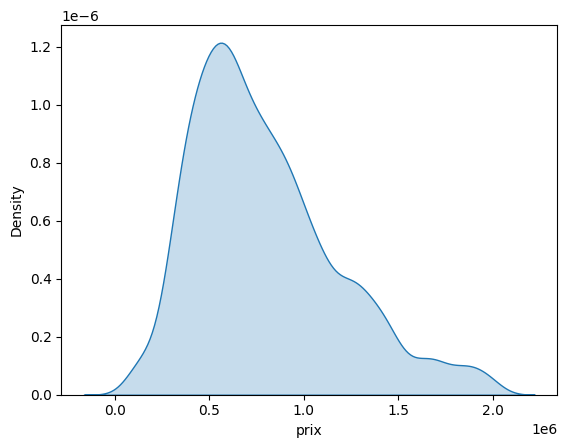

In [ ]:
# densité de la variable prix sous forme de disribution

sns.kdeplot(data = dataset, x = 'prix', fill=True)

Regardons maintenant les distributions des différentes variables numériques.

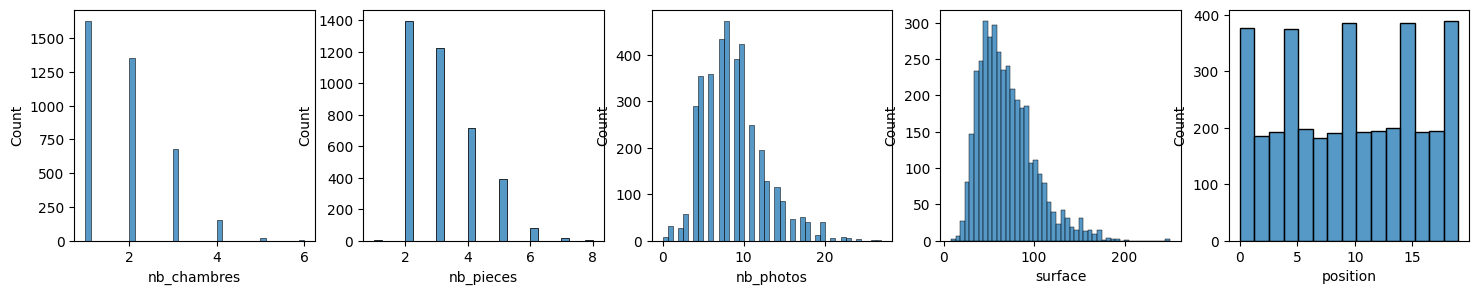

In [ ]:
plt.rcParams["figure.figsize"]

fig, axs = plt.subplots(1,5, figsize=(18,3))
for i, feature in enumerate(numerical):
    sns.histplot(dataset[feature], ax = axs[i])
plt.show()

Nous allons étudier maintenant les corrélation entre les variables numériques et la variable d'intérêt `prix`.

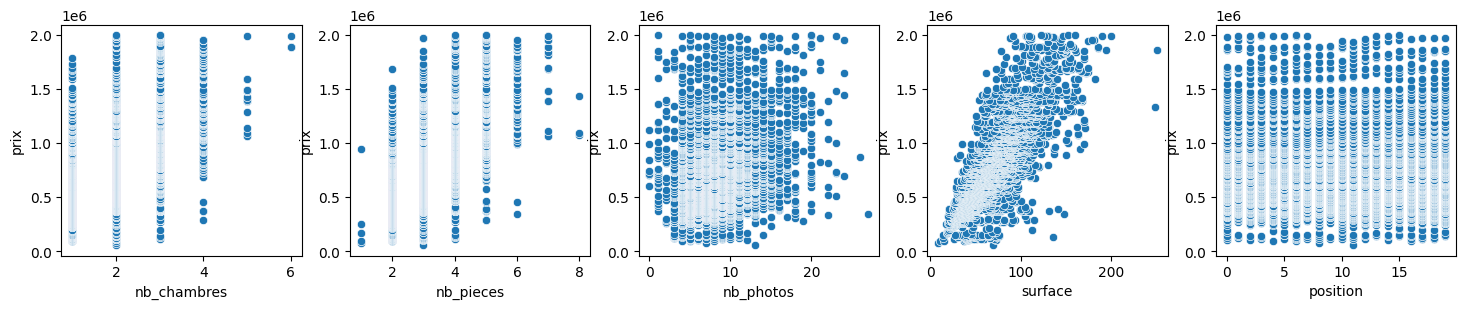

In [ ]:
fig, axs = plt.subplots(1,5, figsize=(18,3))
for i, feature in enumerate(numerical):
    sns.scatterplot(x = dataset[feature], y = dataset['prix'], ax = axs[i])
plt.show()

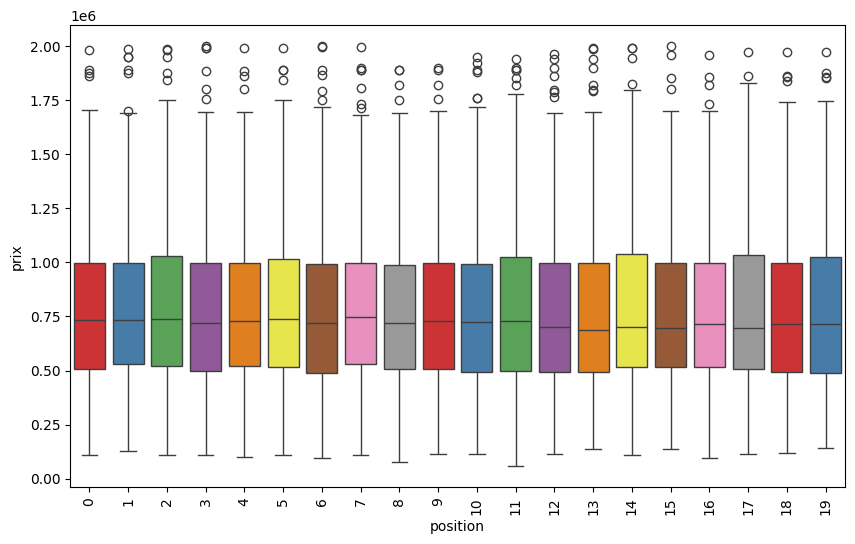

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(y=dataset['prix'], x=dataset['position'], hue=dataset['position'], ax=ax, palette='Set1', legend=False)
ax.tick_params(axis='x', rotation=90)
plt.show()

<Axes: >

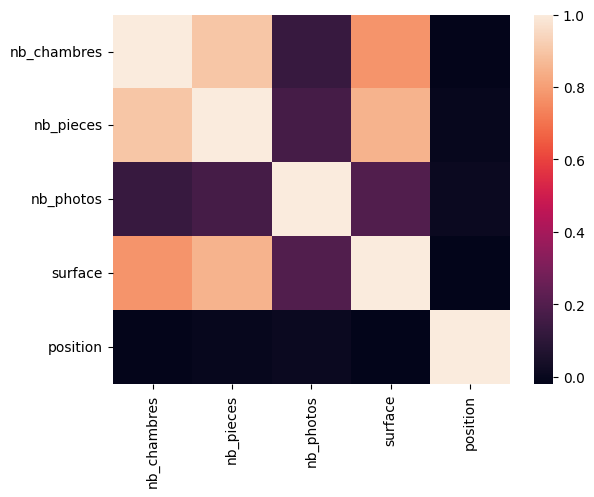

In [ ]:
# Tracer un corrélogramme des variables numériques
sns.heatmap(dataset[numerical].corr())

### Variables catégorielles

On peut commencer pas visualiser les variables qui ont un faible nombre de modalités en fonction de la variable `prix`.

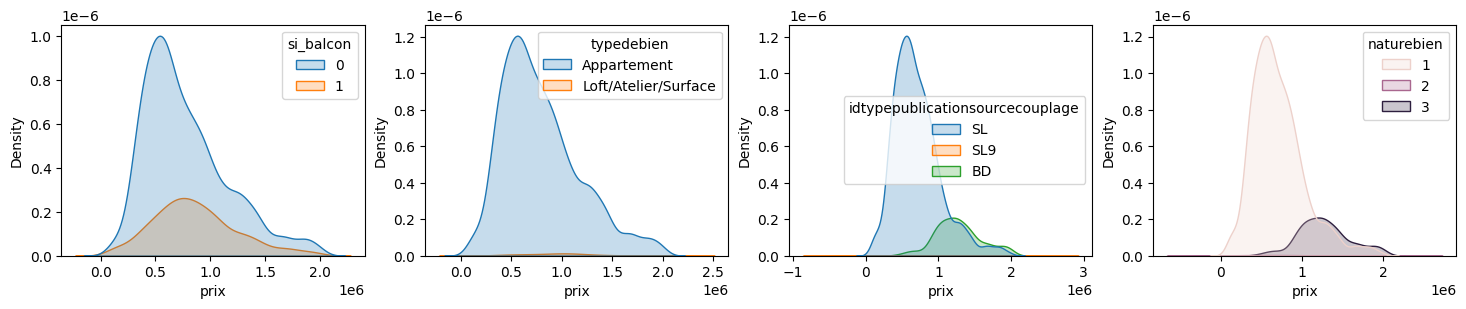

In [ ]:
categorical_sub = ['si_balcon', 'typedebien', 'idtypepublicationsourcecouplage', 'naturebien']
fig, axs = plt.subplots(1, 4, figsize=(18,3))
for i, feature in enumerate(categorical_sub):
    sns.kdeplot(data = dataset, x="prix", hue = feature, fill=True, ax = axs[i])

plt.show()

Regardons maintenant les variables catégorielles ayant un nombre imortant de modalités. Commençons par la variable `ville`.

In [ ]:
# Afficher le nombre de modalités de la variable ville
dataset['ville'].nunique()

112

In [ ]:
# Répartition des observations sur les modalités
dataset['ville'].value_counts()

,count
ville,
Paris 16ème,443
Paris 18ème,308
Paris 15ème,299
Paris 17ème,294
Paris 13ème,278
...,...
St Germain en Laye,1
Meudon,1
Neuilly-sur-Seine,1


In [ ]:
dataset.loc[~dataset['ville'].str.startswith('Paris '), 'ville'] = 'Banlieue'
dataset['ville'].value_counts()

,count
ville,
Paris 16ème,443
Paris 18ème,308
Paris 15ème,299
Paris 17ème,294
Paris 13ème,278
Paris 19ème,212
Paris 11ème,195
Paris 20ème,194
Paris 14ème,194


Nous voyons ici que les villes situées en dehors de Paris sont très faiblement représentées dans le jeu de données. Nous allons les regrouper dans une seule modalité "banlieue".

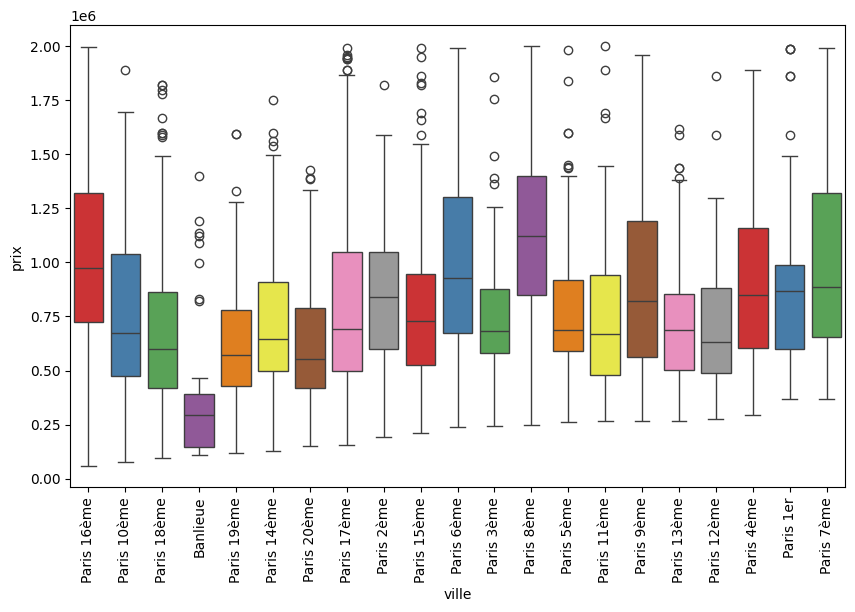

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(y=dataset['prix'], x=dataset['ville'], hue=dataset['ville'], ax=ax, palette='Set1', legend=False)
ax.tick_params(axis='x', rotation=90)
plt.show()

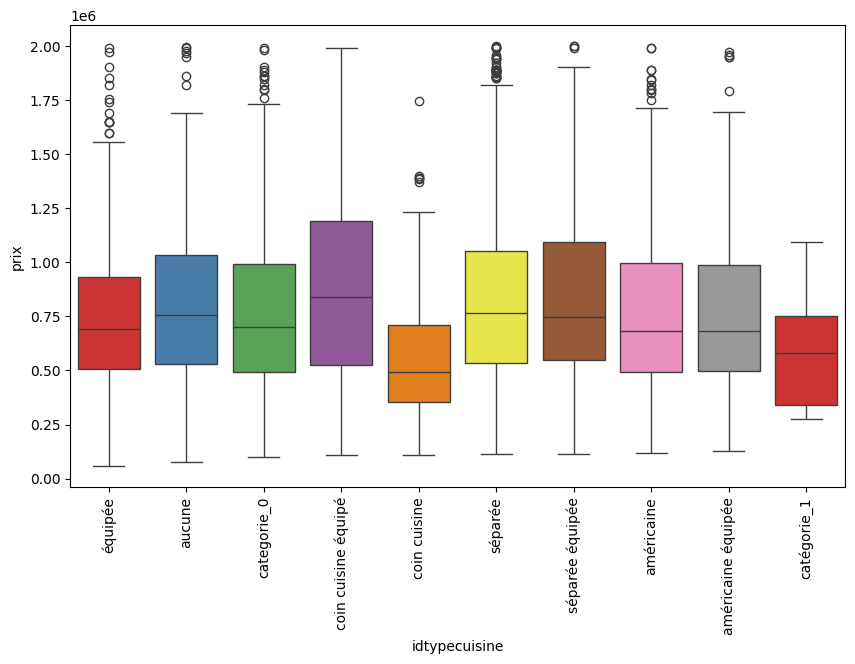

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(y=dataset['prix'], x=dataset['idtypecuisine'], hue=dataset['idtypecuisine'], ax=ax, palette='Set1', legend=False)
ax.tick_params(axis='x', rotation=90)
plt.show()

# Approche explicative : étude des déterminants du prix

On va maintenant essayer de comprendre quelles sont les variables les plus déterminantes qui exliquent le prix d'un bien immobilier. Pour ce faire, nous allons utiliser un modèle de régression linéaire. Mais il nous reste encore une étape : transformer les variables catégorielles en variables numériques.

In [ ]:
dataset.columns

Index(['idtypecuisine', 'idtypepublicationsourcecouplage', 'naturebien',
       'nb_chambres', 'nb_photos', 'nb_pieces', 'position', 'prix',
       'si_balcon', 'surface', 'typedebien', 'ville'],
      dtype='object')

In [ ]:
# Transformer les variables catégorielles en variables numériques avec du one-hot encoding il ne reste que des variables numérique
categorical_sub = [
     'typedebien', 'idtypepublicationsourcecouplage',
    'naturebien','idtypecuisine', 'ville'
]


df = pd.get_dummies(dataset, columns = categorical_sub, drop_first=True).astype(int)
df.head()

,nb_chambres,nb_photos,nb_pieces,position,prix,si_balcon,surface,typedebien_Loft/Atelier/Surface,idtypepublicationsourcecouplage_SL,idtypepublicationsourcecouplage_SL9,naturebien_2,naturebien_3,...,ville_Paris 18ème,ville_Paris 19ème,ville_Paris 1er,ville_Paris 20ème,ville_Paris 2ème,ville_Paris 3ème,ville_Paris 4ème,ville_Paris 5ème,ville_Paris 6ème,ville_Paris 7ème,ville_Paris 8ème,ville_Paris 9ème
0,2,13,3,11,59000,1,69,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
1,2,7,1,8,77500,0,8,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
2,1,8,2,6,94000,0,37,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0
3,2,4,1,16,96000,0,10,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
4,1,5,2,4,100000,0,14,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# normalisation des données

scaler = StandardScaler()
df[numerical] = scaler.fit_transform(df[numerical])
df.head()

,nb_chambres,nb_photos,nb_pieces,position,prix,si_balcon,surface,typedebien_Loft/Atelier/Surface,idtypepublicationsourcecouplage_SL,idtypepublicationsourcecouplage_SL9,naturebien_2,naturebien_3,...,ville_Paris 18ème,ville_Paris 19ème,ville_Paris 1er,ville_Paris 20ème,ville_Paris 2ème,ville_Paris 3ème,ville_Paris 4ème,ville_Paris 5ème,ville_Paris 6ème,ville_Paris 7ème,ville_Paris 8ème,ville_Paris 9ème
0,0.168640,1.137028,-0.096391,0.247510,59000,1,-0.022054,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
1,0.168640,-0.456086,-1.898669,-0.273185,77500,0,-2.031644,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.951635,-0.190567,-0.997530,-0.620315,94000,0,-1.076266,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0
3,0.168640,-1.252642,-1.898669,1.115335,96000,0,-1.965756,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
4,-0.951635,-0.987124,-0.997530,-0.967445,100000,0,-1.833980,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(3833, 41)

## Régression linéaire

In [ ]:
import statsmodels.api as sm

# Définir la variable dépendante (label) y et les variables explicatives X
y = df['prix']
X = df.drop(['prix'], axis=1)

# Ajouter une constante à la matrice de design X
X = sm.add_constant(X)

# Ajuster un modèle linéaire
model = sm.OLS(y, X).fit()

# Afficher les informations sur le modèle
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   prix   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     430.0
Date:                Tue, 01 Jul 2025   Prob (F-statistic):               0.00
Time:                        09:32:09   Log-Likelihood:                -51461.
No. Observations:                3833   AIC:                         1.030e+05
Df Residuals:                    3792   BIC:                         1.033e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [ ]:
# Sélectionner les variables ayant une p-valeue inférieures à 0.05

selected_columns = X.columns[model.pvalues < 0.05]
selected_columns



Index(['si_balcon', 'surface', 'typedebien_Loft/Atelier/Surface',
       'idtypecuisine_séparée', 'ville_Paris 10ème', 'ville_Paris 11ème',
       'ville_Paris 12ème', 'ville_Paris 13ème', 'ville_Paris 14ème',
       'ville_Paris 15ème', 'ville_Paris 16ème', 'ville_Paris 17ème',
       'ville_Paris 18ème', 'ville_Paris 19ème', 'ville_Paris 1er',
       'ville_Paris 20ème', 'ville_Paris 2ème', 'ville_Paris 3ème',
       'ville_Paris 4ème', 'ville_Paris 5ème', 'ville_Paris 6ème',
       'ville_Paris 7ème', 'ville_Paris 8ème', 'ville_Paris 9ème'],
      dtype='object')

In [ ]:
# Ajuster une régression linéaire avec les variables sélectionnées

X = df[selected_columns]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   prix   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     603.7
Date:                Tue, 01 Jul 2025   Prob (F-statistic):               0.00
Time:                        09:32:09   Log-Likelihood:                -51732.
No. Observations:                3833   AIC:                         1.035e+05
Df Residuals:                    3808   BIC:                         1.037e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

# Prédire les prix

On se propose maintenant de prédire les prix des biens immobliers.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import numpy as np
# Séparer les données en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner le modèle de régression linéaire sur les données d'entraînement
model = sm.OLS(y_train, X_train).fit()

# Prédire les prix des biens immobiliers sur les données de test
y_pred = model.predict(X_test)

# Évaluer les performances du modèle
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean squared error: {rmse}")


Root Mean squared error: 180888.74247612112


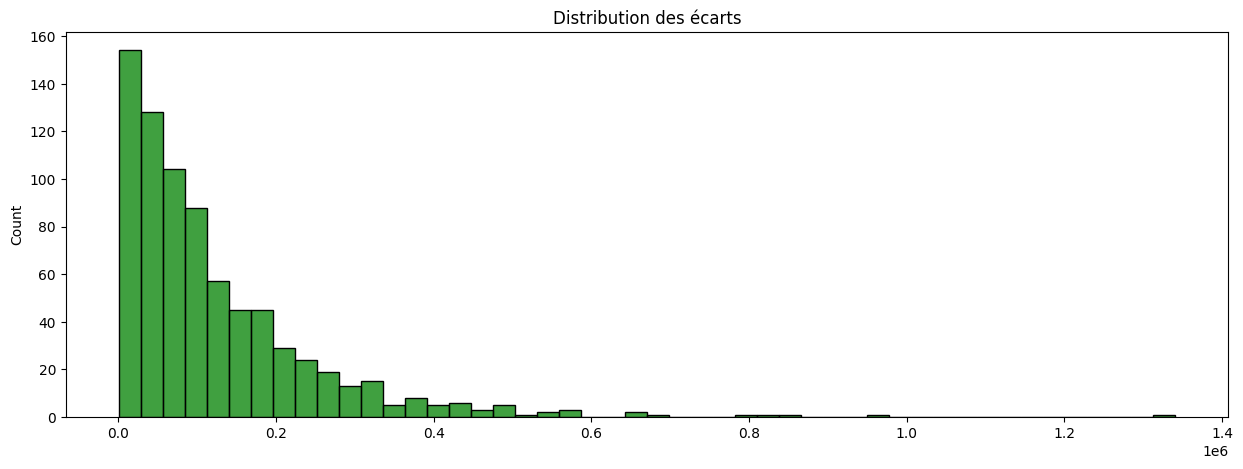

In [ ]:


ecarts = np.abs(y_pred - y_test)

fig, ax = plt.subplots(figsize=(15, 5))
sns.histplot(ecarts, ax=ax, color='green', kde=False)
ax.set_title('Distribution des écarts')
plt.show()
